In [1]:
import numpy as np

In [2]:
my_numpy_array = np.random.rand(3)

In [3]:
type(my_numpy_array)

numpy.ndarray

In [4]:
my_numpy_array[0]

0.9105238761105684

In [5]:
import pandas as pd

In [6]:
my_series = pd.Series(my_numpy_array, index=["First", "Second", "Third"])
my_series

First     0.910524
Second    0.292995
Third     0.664726
dtype: float64

In [7]:
my_series[0]

0.9105238761105684

In [8]:
my_series.index

Index(['First', 'Second', 'Third'], dtype='object')

In [9]:
array_2d = np.random.rand(3,2)

In [10]:
array_2d[0,1]

0.8999550237594672

In [11]:
df = pd.DataFrame(array_2d)

In [12]:
df

,0,1
0,0.322783,0.899955
1,0.786874,0.001156
2,0.134721,0.212001


In [13]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [14]:
df.columns = ["First", "Second"]

In [15]:
df

,First,Second
0,0.322783,0.899955
1,0.786874,0.001156
2,0.134721,0.212001


In [16]:
df["Second"]

0    0.899955
1    0.001156
2    0.212001
Name: Second, dtype: float64

In [17]:
# read the first 5 rows
#df = pd.read_csv('artwork_data.csv')

# All columns we are using
COLS_TO_USE = ['id', 'artist',
                  'title', 'medium', 'year', 'acquisitionYear', 'height',
                  'width', 'units']

In [18]:
df=pd.read_csv('artwork_data.csv',index_col='id',
                usecols=COLS_TO_USE)
df

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\260144216.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('artwork_data.csv',index_col='id',


,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm
...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305,305.0,mm
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305,305.0,mm
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45,2410.0,mm


In [19]:
import json

In [20]:
#example usage of from_records method
records = [("Espresso", '5$'),
          ("Flat White", "10$")]
pd.DataFrame.from_records(records)
pd.DataFrame.from_records(records,
                         columns=["Coffee", "Price"])


,Coffee,Price
0,Espresso,5$
1,Flat White,10$


In [21]:
# import json 
KEYS_TO_USE = ['id', 'all_artists',
                  'title', 'medium', 'dateText', 'acquisitionYear', 'height',
                  'width', 'units']
def get_record_from_file(file_path, KEYS_TO_USE):
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
    
    record = []
    for field in KEYS_TO_USE:
        record.append(content[field])
    return tuple(record)

# single file processing
sample_record = get_record_from_file('a00001-1035.json', KEYS_TO_USE)

In [22]:
sample_record

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 'date not known',
 1922,
 '419',
 '394',
 'mm')

In [23]:
# Demo1
df.artist
artists = df['artist']
pd.unique(artists)
len(pd.unique(artists))

3336

In [24]:
# demo 2
s = df['artist']=='Bacon, Francis'
s.value_counts()

False    69151
True        50
Name: artist, dtype: int64

In [25]:
# other way
artist_counts = df['artist'].value_counts()
artist_counts['Bacon, Francis']

50

In [26]:
# demo 3
df.loc[1035, 'artist']
#df.iloc[0, 0]
#df.iloc[0, :]
df.iloc[0:2, 0:2]

,artist,title
id,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f..."


In [27]:
# try multipliation
#df['height'] * df['width']
df.shape


(69201, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   artist           69201 non-null  object 
 1   title            69201 non-null  object 
 2   medium           62817 non-null  object 
 3   year             63823 non-null  object 
 4   acquisitionYear  69156 non-null  float64
 5   width            65860 non-null  object 
 6   height           65860 non-null  object 
 7   units            65860 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.8+ MB


In [29]:
#df['width'].astype(float) * df['height'].astype(float)
df['width'].sort_values().head()
df['width'].sort_values().tail()
type(df['width'])

pandas.core.series.Series

In [30]:
# try to convert
#pd.to_numeric(df['width'])
# force nans
#pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\3446483944.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')


In [31]:
type(df['width'])

pandas.core.series.Series

In [32]:
df.loc[:,'height'] = pd.to_numeric(df['height'], errors='coerce')

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\2826523437.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'height'] = pd.to_numeric(df['height'], errors='coerce')


In [33]:
df['height'].dtype


dtype('float64')

In [34]:
df['height'] * df['width']

id
1035      165086.0
1036       66243.0
1037      160181.0
1038      125292.0
1039       81405.0
            ...   
122960     93025.0
122961     93025.0
121181    108450.0
112306         NaN
127035    335280.0
Length: 69201, dtype: float64

In [35]:
df['units'].value_counts()

mm    65860
Name: units, dtype: int64

In [36]:
# assign - create new columns with size
area = df['height']*df['width']
df = df.assign(area=area)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   artist           69201 non-null  object 
 1   title            69201 non-null  object 
 2   medium           62817 non-null  object 
 3   year             63823 non-null  object 
 4   acquisitionYear  69156 non-null  float64
 5   width            65834 non-null  float64
 6   height           65859 non-null  float64
 7   units            65860 non-null  object 
 8   area             65833 non-null  float64
dtypes: float64(4), object(5)
memory usage: 7.3+ MB


In [38]:
df['area'].max()

132462000.0

In [39]:
df['area'].idxmax()

98367

In [40]:
df.loc[df['area'].idxmax(),:]

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                           2003.0
acquisitionYear                                2008.0
width                                          8920.0
height                                        14850.0
units                                              mm
area                                      132462000.0
Name: 98367, dtype: object

In [41]:
# iteration
small_df = df.iloc[49980:50019, :].copy()
grouped = small_df.groupby('artist')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [42]:
for name, group_df in grouped:
    #print(name)
    print(group_df)
    break

                artist            title               medium    year  \
id                                                                     
4704  Frost, Sir Terry        Blue Moon  Lithograph on paper  1952.0   
4705  Frost, Sir Terry      Boat Shapes     Linocut on paper  1952.0   
4706  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954.0   
4707  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954.0   
4708  Frost, Sir Terry            Leeds    Drypoint on paper  1956.0   
4709  Frost, Sir Terry  Camping, Anduze     Etching on paper  1979.0   
4710  Frost, Sir Terry     Umea, Sweden     Etching on paper  1979.0   
4711  Frost, Sir Terry    Self-Portrait     Etching on paper  1980.0   

      acquisitionYear  width  height units     area  
id                                                   
4704           1983.0  355.0   273.0    mm  96915.0  
4705           1983.0  132.0   143.0    mm  18876.0  
4706           1983.0  131.0   155.0    mm  20305.0  
4707     

In [43]:
# aggregate 
# min
for name, group_df in small_df.groupby('artist'):
    min_year = group_df['acquisitionYear'].min()
    print("{}: {}".format(name, min_year))

Frost, Sir Terry: 1983.0
Phillips, Esq Tom: 1983.0
Wols: 1983.0


In [44]:
# Transform
# Equivalent of editing by hand:
# make a case when there is no data to infer
def fill_values(series):
    values_counted = series.value_counts()
    if values_counted.empty:
        return series
    most_frequent = values_counted.index[0]
    new_medium = series.fillna(most_frequent)
    return new_medium

def transform_df(source_df):
    group_dfs = []
    for name, group_df in source_df.groupby('artist'):
        filled_df =group_df.copy()
        filled_df.loc[:,'medium'] = fill_values(group_df['medium'])
        group_dfs.append(filled_df)
    
    new_df = pd.concat(group_dfs)
    return new_df

# now check the result
filled_df = transform_df(small_df)
filled_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
4704,"Frost, Sir Terry",Blue Moon,Lithograph on paper,1952.0,1983.0,355.0,273.0,mm,96915.0
4705,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1952.0,1983.0,132.0,143.0,mm,18876.0
4706,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,131.0,155.0,mm,20305.0
4707,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,193.0,267.0,mm,51531.0
4708,"Frost, Sir Terry",Leeds,Drypoint on paper,1956.0,1983.0,125.0,167.0,mm,20875.0
4709,"Frost, Sir Terry","Camping, Anduze",Etching on paper,1979.0,1983.0,257.0,209.0,mm,53713.0
4710,"Frost, Sir Terry","Umea, Sweden",Etching on paper,1979.0,1983.0,NaN,NaN,NaN,NaN
4711,"Frost, Sir Terry",Self-Portrait,Etching on paper,1980.0,1983.0,277.0,200.0,mm,55400.0
11838,"Phillips, Esq Tom",[colophon],Etching on paper,1979.0,1983.0,292.0,204.0,mm,59568.0


In [45]:
# build-ins
# transfor
grouped_mediums = small_df.groupby('artist')['medium']
small_df.loc[:,'medium'] = grouped_mediums.transform(fill_values)

In [46]:
# min
df.groupby('artist').agg(np.min)
df.groupby('artist').min()

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\2761454280.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('artist').agg(np.min)
C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\2761454280.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('artist').min()


,title,acquisitionYear,width,height,area
artist,,,,,
?British School,"Portrait of a Gentleman, probably of the West ...",1927.0,1330.0,785.0,1044050.0
"Abakanowicz, Magdalena",Abakan Orange,2009.0,NaN,NaN,NaN
"Abbey, Edwin Austin",Illustration to ‘Judith Shakespeare’,1924.0,251.0,254.0,74045.0
"Abbott, Berenice",Dinty Moore Antiques,2010.0,240.0,180.0,43200.0
"Abbott, Lemuel Francis","Henry Byne, of Carshalton",1885.0,737.0,610.0,449570.0
...,...,...,...,...,...
"Zuloaga, Ignacio",View of the Escorial,1923.0,292.0,406.0,118552.0
"Zyw, Aleksander",Light,1962.0,934.0,662.0,618308.0
"di Suvero, Mark",Tetra,2004.0,1152.0,843.0,971136.0


In [47]:
#filter
grouped_titles = df.groupby('title')
title_counts = grouped_titles.size().sort_values(ascending=False)

condition = lambda x: len(x.index) >1
dup_title_df = grouped_titles.filter(condition)
dup_title_df.sort_values('title', inplace=True)
dup_title_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
20571,"Scully, Sean",#1,Aquatint on paper,1992.0,1992.0,117.0,174.0,mm,20358.0
21345,"Dunham, Carroll",#1,Drypoint on paper,1989.0,2002.0,392.0,579.0,mm,226968.0
21346,"Dunham, Carroll",#2,Drypoint on paper,1989.0,2002.0,392.0,579.0,mm,226968.0
20572,"Scully, Sean",#2,Aquatint on paper,1992.0,1992.0,323.0,278.0,mm,89794.0
21347,"Dunham, Carroll",#3,Drypoint on paper,1989.0,2002.0,392.0,579.0,mm,226968.0
...,...,...,...,...,...,...,...,...,...
97431,"Warhol, Andy",“The Runaway Pigeon”,Ink on paper on ink on paper,1953.0,2009.0,280.0,205.0,mm,57400.0
97408,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953.0,2009.0,269.0,295.0,mm,79355.0
97409,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953.0,2009.0,272.0,237.0,mm,64464.0


In [48]:
# output the data to excel, sql, json
small_df.to_excel('basic.xlsx')
small_df.to_excel('no_index.xlsx', index=False)
small_df.to_excel('columns.xlsx', columns=['artist', 'title', 'year'])


In [49]:
# multiple worksheets
writer = pd.ExcelWriter('multiple_sheets.xlsx', engine='xlsxwriter')
small_df.to_excel(writer, sheet_name='Preview', index= False)
df.to_excel(writer, sheet_name='Complete', index=False)
writer.save()

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\2097828610.py:5: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [50]:
# conditional formatting
artist_counts = df['artist'].value_counts()
artist_counts.head()
writer = pd.ExcelWriter('colors.xlsx', engine='xlsxwriter')
artist_counts.to_excel(writer, sheet_name='Artist Counts')
sheet = writer.sheets['Artist Counts']
cells_range = 'B2:B{}'.format(len(artist_counts.index))
sheet.conditional_format(cells_range, {'type': '2_color_scale',
                                      'min_value': '10',
                                      'min_type': 'percentile',
                                      'max_value': '99',
                                      'max_type': 'percentitle'})

writer.save()

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\1418458492.py:14: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [51]:
# SQL
import sqlite3

with sqlite3.connect('my_database.db') as conn:
    small_df.to_sql('Tate', conn)

In [52]:
# JSON
small_df.to_json('default.json')
small_df.to_json('table.json', orient='table')

<AxesSubplot: xlabel='acquisitionYear'>

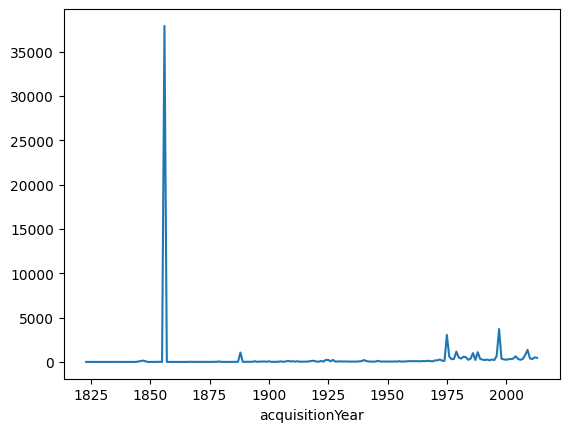

In [53]:
# plotting
acquisition_years = df.groupby('acquisitionYear').size()
acquisition_years.plot()


In [54]:
acquisition_years.head()

acquisitionYear
1823.0    1
1824.0    2
1826.0    4
1827.0    1
1828.0    3
dtype: int64

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13704\3874988359.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


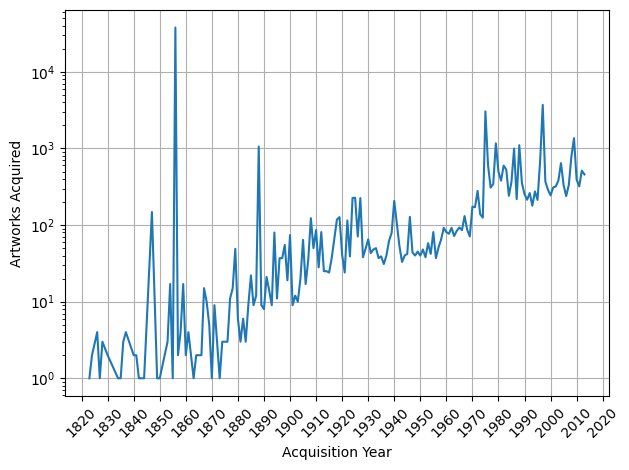

In [61]:
# start using matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True,
                'axes.titlepad':20})

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
acquisition_years.plot(ax=subplot, rot=45, logy=True, grid=True)
subplot.set_xlabel('Acquisition Year')
subplot.set_ylabel('Artworks Acquired')
subplot.locator_params(nbins=40, axis='x')
fig.show()

In [62]:
# save to files
fig.savefig('plot.png')
fig.savefig('plot.svg', format='svg')